#  <span style="color:green"> Product Recommedation System

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [4]:
# Loading the dataset
df = pd.read_csv('amazon.csv')

# Data Preview

In [6]:
#Displaying first 5 records
print("Dataset Overview:")
df.head()

Dataset Overview:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
#Displaying last 5 records
df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


# Data Size

In [9]:
df.shape

(1465, 16)

# Columns

In [11]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

# Data Types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

- We have 1465 X 16 
- The dataset has 1465 rows and 16 columns, and all are homogeneous, with all columns being objects (strings).

#  Statistics Summary :

In [16]:
# Summary statistics for all columns
print("# Summary statistics for all columns:")
print(df.describe(include='all'))
print("-" * 50)  # Adding a separator line for all column 

# Summary statistics for all columns:
        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹

# Missing Values

1. Firstly we will check on Missing Values

In [19]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [20]:
df.isnull().sum()[df.isnull().sum()>0]

rating_count    2
dtype: int64

1. Firstly we will Visualizing Missing Values

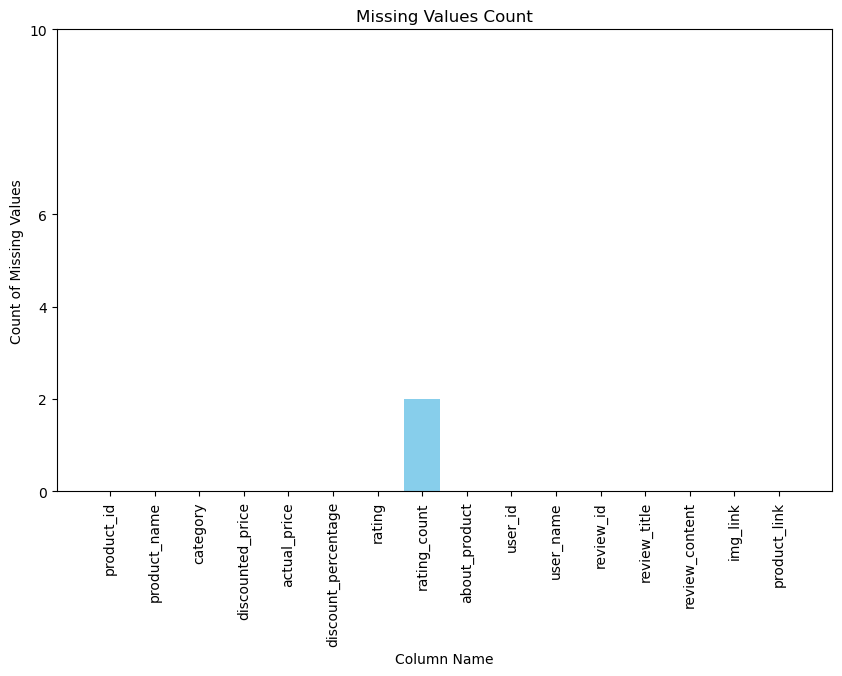

In [22]:
import matplotlib.pyplot as plt

# Calculate the missing values count
missing_values = df.isnull().sum()

# Plot the missing values count
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values, color='skyblue')
plt.title('Missing Values Count')
plt.xlabel('Column Name')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks([0, 2, 4, 6, 10])  # Set custom y-axis tick values
plt.show()

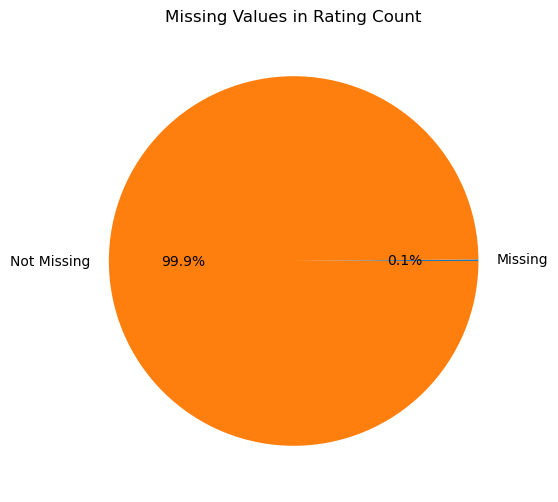

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of missing values in rating_count
missing_percentage = df['rating_count'].isnull().sum() / len(df) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([missing_percentage, 100 - missing_percentage], labels=['Missing', 'Not Missing'], autopct='%1.1f%%')
plt.title('Missing Values in Rating Count')
plt.show()

In [24]:
# Define a custom function to remove '|' and convert to float
def convert_to_float(x):
    x = str(x).replace('|', '')
    x = x.replace('₹', '').replace(',', '')
    try:
        return float(x)
    except ValueError:
        return np.nan

# Apply the custom function to the columns
df['discounted_price'] = df['discounted_price'].apply(convert_to_float)
df['actual_price'] = df['actual_price'].apply(convert_to_float)
df['rating'] = df['rating'].apply(convert_to_float)

# Drop rows with NaN values
df = df.dropna()

df.isnull().sum()[df.isnull().sum()>0]
 
# Finally checking for any remaining missing values 
print("Remaining missing values = \n", df.isnull().sum()[df.isnull().sum() > 0])
df.isna().sum()

Remaining missing values = 
 Series([], dtype: int64)


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

<h3 style="color:#00A36C"> However, we had only 2 NaN values in the rating_count column, so dropped those using df.dropna()</h3
                                                                                                                            
<h3> And dropping them had a minimal impact on the dataset </h3>


In [26]:
# Finally checking for any remaining missing values 
print("Remaining missing values = \n", df.isnull().sum()[df.isnull().sum() > 0])
df.isna().sum()

Remaining missing values = 
 Series([], dtype: int64)


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

- No missing values now.

##  Cleaning the Categorical columns  


In [29]:
# Clean the category column
df['category'] = df['category'].str.replace('|', ',')

# Clean the about_product column
df['about_product'] = df['about_product'].str.replace(r'[^a-zA-Z0-9\s]', '').str.lower()

# Clean the review_title column
df['review_title'] = df['review_title'].str.replace(r'[^a-zA-Z0-9\s]', '').str.lower()

# Clean the review_content column
df['review_content'] = df['review_content'].str.replace(r'[^a-zA-Z0-9\s]', '').str.lower()

# Convert rating_count to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop any rows with missing values
df.dropna(inplace=True)

# Calculate the discount amount
df['discount_amount'] = df['actual_price'] - df['discounted_price']

df.head()  # Print the first few rows of the cleaned dataframe


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discount_amount
20,B09C6HXFC1,Duracell USB Lightning Apple Certified (Mfi) B...,"Computers&Accessories,Accessories&Peripherals,...",970.0,1799.0,46%,4.5,815.0,supports ios devices with max output up to 2.4...,"AFNYIBWKJLJQKY4BGK77ZOTVMORA,AFCTNNMP2LZLY5466...","Prasannavijayaraghavan G.,Preet Sikka,Theeban ...","R12D1BZF9MU8TN,R32MNCWO5LGFCG,RZU3UK8OZKD6X,R3...","good cable for car,good substitute for orginal...",i trust this product! works well with car play...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/DURACELL-Lightning-Certi...,829.0
28,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,"Computers&Accessories,Accessories&Peripherals,...",970.0,1999.0,51%,4.4,184.0,1.2m tangle free durable tough braiding sync &...,"AHZWJCVEIEI76H2VGMUSN5D735IQ,AH2DFUHFTG4CKQFVG...","Amazon Customer,Govind Gujarathi,Vihari,shalem...","R1Y30KU04V3QF4,RK3DSUGKIZT8Z,R3BIG7J6V2JZTU,R1...","very good product.,using as a spare cable in c...","fast charging.,cable seems to be of good quali...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Duracell-Lightning-Certi...,1029.0
32,B08QSC1XY8,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,"Computers&Accessories,Accessories&Peripherals,...",389.0,1099.0,65%,4.3,974.0,{3a/qc 3.0 fast charging and data sync} : this...,"AHMKXORT3VNMB75C3EUBYMFYELFQ,AEKJRELVNMICYPOYT...","Pratyush Pahuja,Thiyagarajan,yeses,Amazon Cust...","R2S0AYWUV349HP,R35OW9CYQNAYHY,R3B3DDF1D5NULK,R...","great cable, charging speeds could be better,g...",not charging as fast as i'd have expected. may...,https://m.media-amazon.com/images/I/419QKVTxaS...,https://www.amazon.in/Charging-Braided-Charger...,710.0
33,B008FWZGSG,Samsung Original Type C to C Cable - 3.28 Feet...,"Computers&Accessories,Accessories&Peripherals,...",599.0,599.0,0%,4.3,355.0,usb type-c to type-c cable with universal comp...,"AEQWVGESA7TDGK7KZ4DAJQGYH32A,AECGAMNNIMW5QOPOB...","Verified Buyer,Avishek Majumdar,Drowna roy,mah...","R2Z9ENI1BK4EAB,R2JTBG4GO7WPMG,R3GKCN4UH999M8,R...","good,genuine product,not first charge this cab...","buy it,received in good condition and is worki...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Samsung-Original-Type-Ca...,0.0
37,B09RZS1NQT,"Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...","Computers&Accessories,Accessories&Peripherals,...",199.0,999.0,80%,4.0,576.0,[usb c to usb c cord 1m] with this 1 meter usb...,"AHUH7OYN3LAUATF5EGA575WCDI6A,AFQRX6TAM6CHKARXI...","Anmol,Vani,Tejas Jha,Rishabh Gupta,Nik,Harsha,...","RW294SCHB5QTK,R24AGC1O5RVWYI,R3NT7AA2V3I2FB,R2...","worth it!,good one,robust and effective.,good,...",it does the job really well. no complaints reg...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-Type-C-Compatible...,800.0


In [30]:
df.describe()

,discounted_price,actual_price,rating,rating_count,discount_amount
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,1795.659723,3708.036923,3.988000,346.236923,1912.377200
std,3833.639274,7342.663041,0.398853,266.054359,3823.415538
min,69.000000,79.000000,2.000000,2.000000,0.000000
25%,299.000000,849.000000,3.800000,119.000000,430.000000
50%,599.000000,1499.000000,4.100000,291.000000,801.000000
75%,1529.000000,3080.000000,4.300000,538.000000,1610.000000
max,37247.000000,65000.000000,5.000000,989.000000,35010.000000


# EDA 

## 1. Histogram plot : 
- A. Visualizing the distribution of discounted prices and actual price helps us understand the price range and frequency of different price points

- B. Additionally, visualizing the distribution of ratings can help us understand the frequency of different rating categories."e

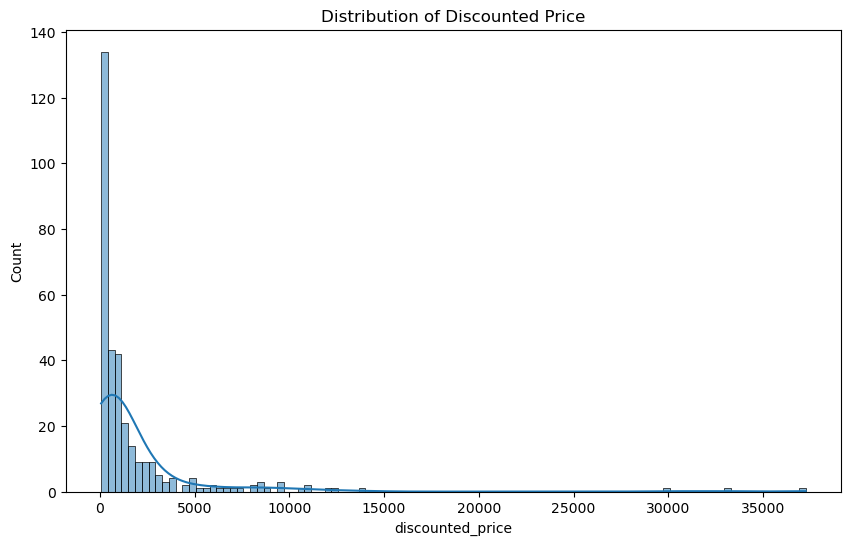

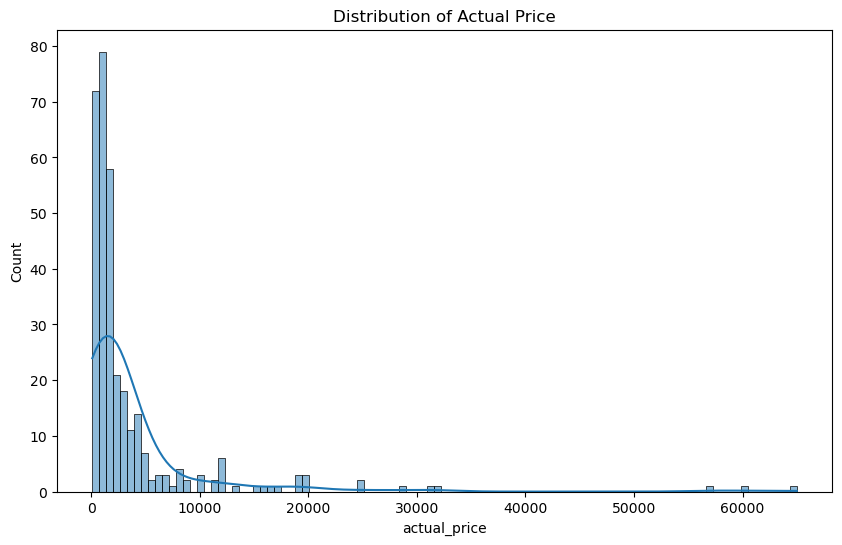

In [33]:
# Visualize distributions
plt.figure(figsize=(10,6))
sns.histplot(df['discounted_price'], kde=True)
plt.title('Distribution of Discounted Price')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['actual_price'], kde=True)
plt.title('Distribution of Actual Price')
plt.show()


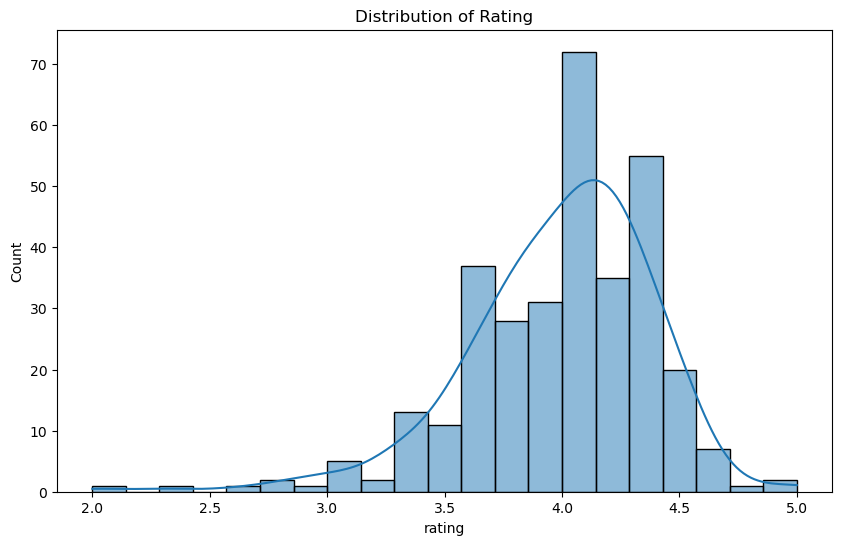

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Rating')
plt.show()

## 2. Box Plot
- A . Box plots help detect outliers in numerical columns by showing the spread and identifying extreme values.
- B . 
Visualize the distribution of discounted prices 
Compare the distribution of actual prices across different discount percentage categorievalues

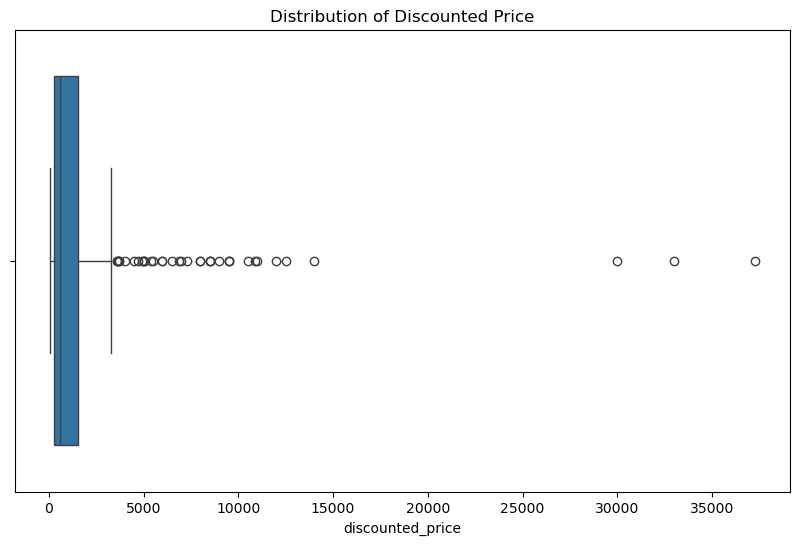

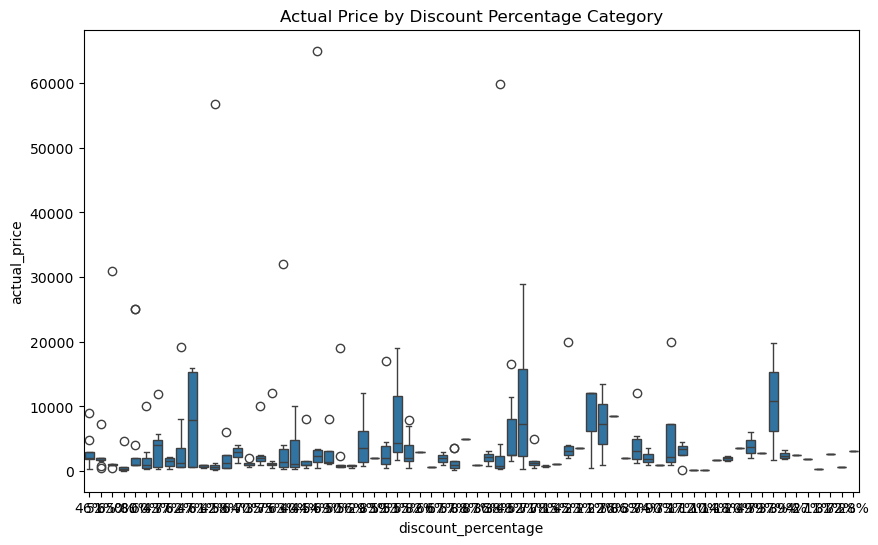

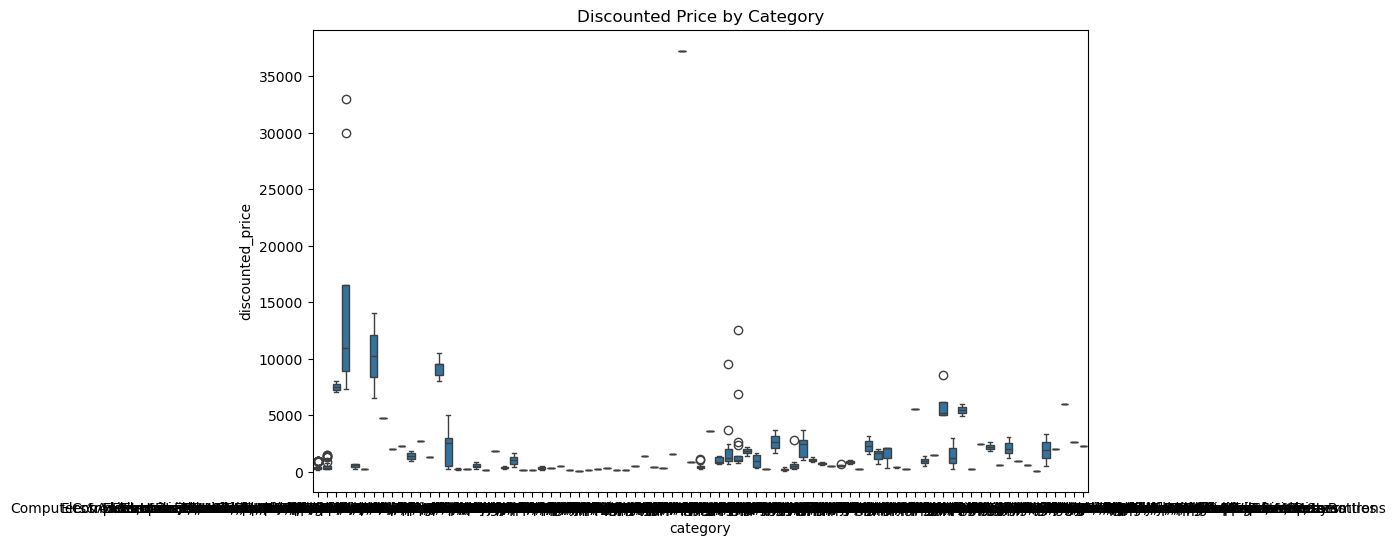

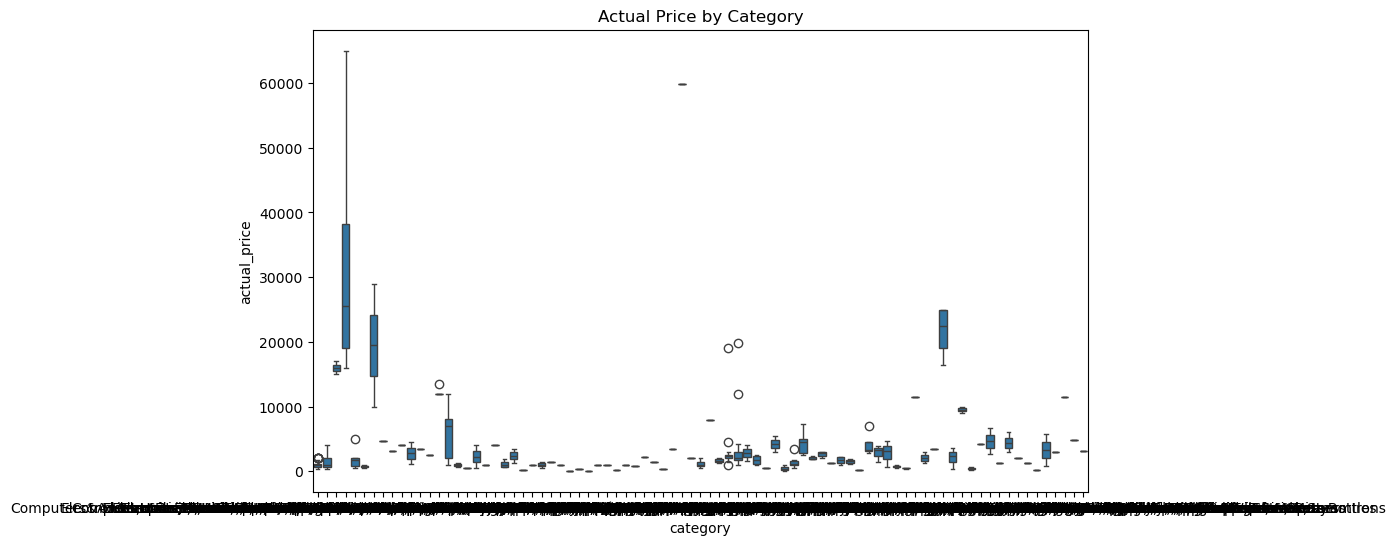

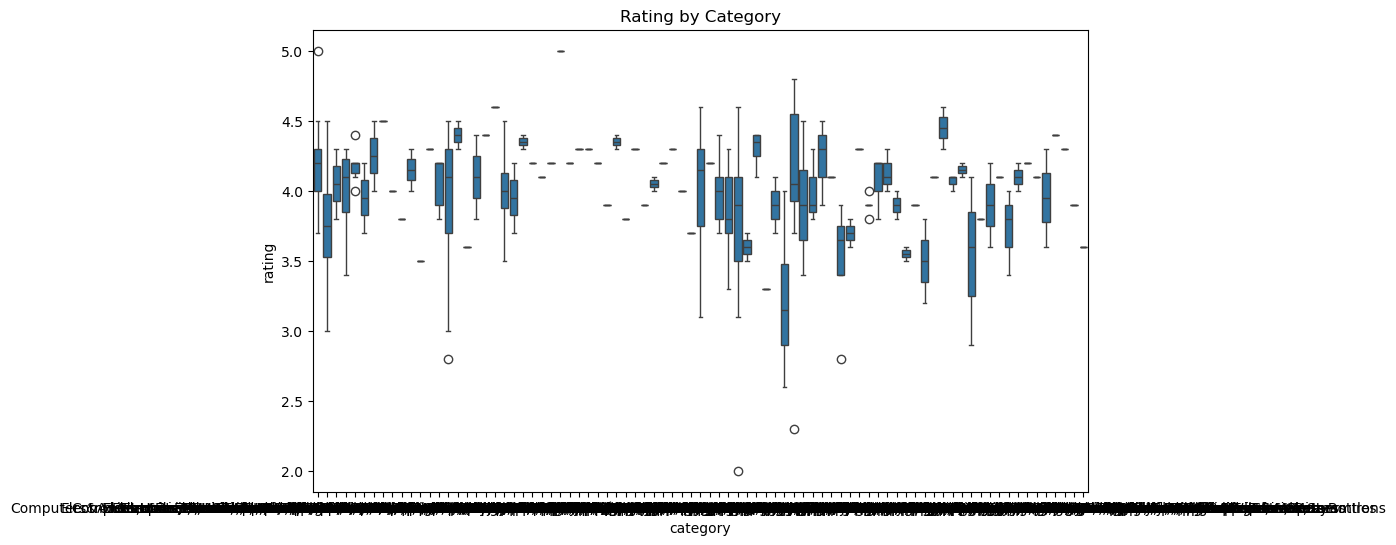

In [36]:
# Box plot for discounted price
plt.figure(figsize=(10,6))
sns.boxplot(x='discounted_price', data=df)
plt.title('Distribution of Discounted Price')
plt.show()

# Box plot for actual price by discount percentage category
plt.figure(figsize=(10,6))
sns.boxplot(x='discount_percentage', y='actual_price', data=df)
plt.title('Actual Price by Discount Percentage Category')
plt.show()

# Create boxplot for discounted_price by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='discounted_price', data=df)  # x='category' sets category as x-axis variable
plt.title('Discounted Price by Category')  # adds title to plot
plt.show()

# Box plot for actual_price 
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='actual_price', data=df)
plt.title('Actual Price by Category')
plt.show()

# Box plot for and rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='rating', data=df)
plt.title('Rating by Category')
plt.show()

## 3. Scatter plot :
- A. Scatter plots are used to identify potential correlations and patterns between these numerical variables.
- B. By examining these relationships, you can gain insights into the data and potentially identify trends or patterns.

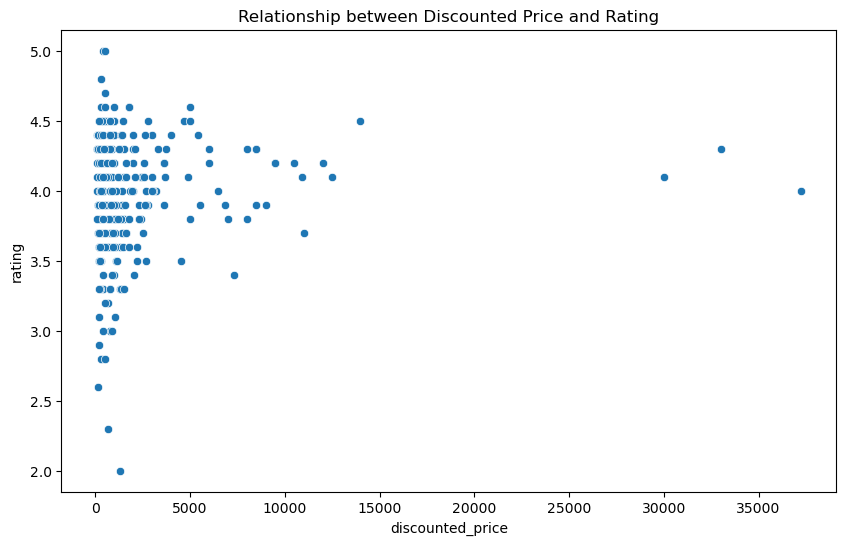

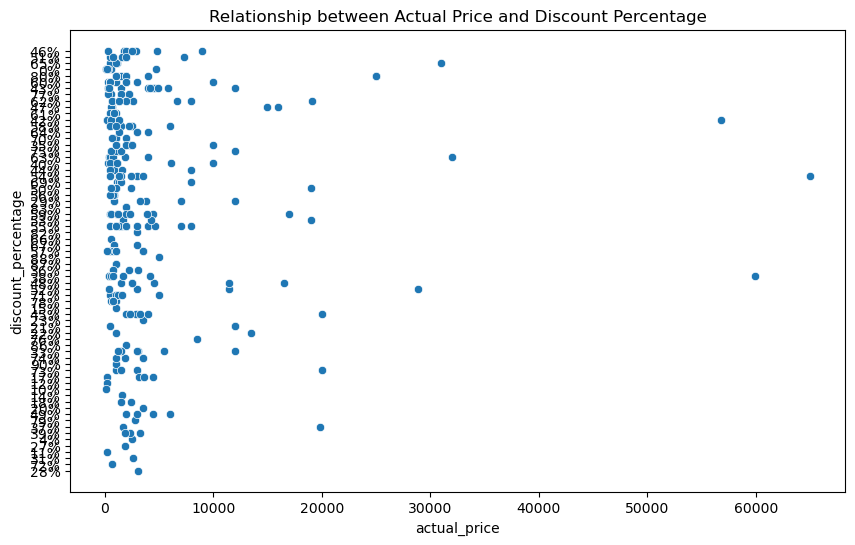

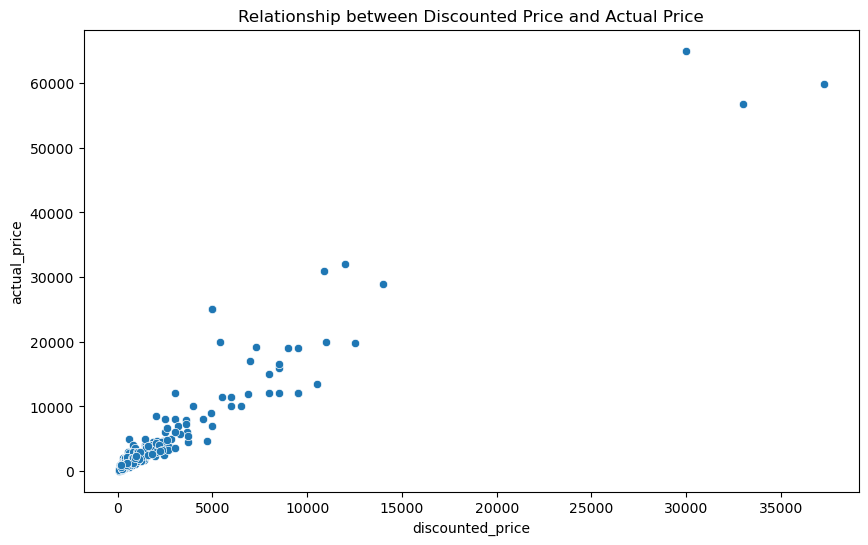

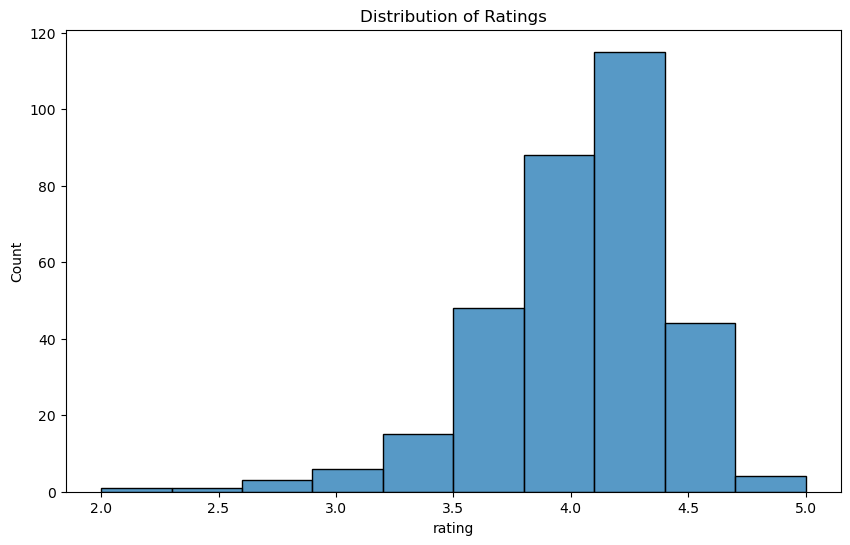

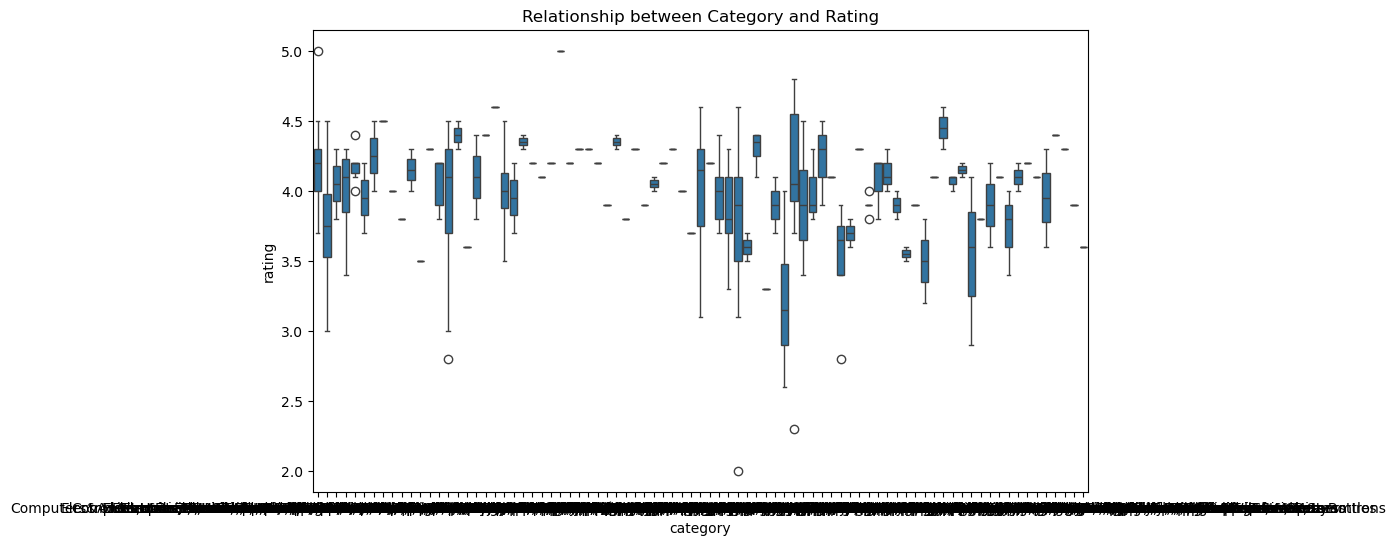

In [38]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
fig_size = (10, 6)

# Plot 1: Relationship between Discounted Price and Rating
plt.figure(figsize=fig_size)
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.title('Relationship between Discounted Price and Rating')
plt.show()

# Plot 2: Relationship between Actual Price and Discount Percentage
plt.figure(figsize=fig_size)
sns.scatterplot(x='actual_price', y='discount_percentage', data=df)
plt.title('Relationship between Actual Price and Discount Percentage')
plt.show()

# Plot 3: Relationship between Discounted Price and Actual Price
plt.figure(figsize=fig_size)
sns.scatterplot(x='discounted_price', y='actual_price', data=df)
plt.title('Relationship between Discounted Price and Actual Price')
plt.show()

# Plot 4: Distribution of Ratings
plt.figure(figsize=fig_size)
sns.histplot(x='rating', data=df, bins=10)
plt.title('Distribution of Ratings')
plt.show()

# Plot 5: Relationship between Category and Rating
plt.figure(figsize=fig_size)
sns.boxplot(x='category', y='rating', data=df)
plt.title('Relationship between Category and Rating')
plt.show()

## 4 . Count plots : 
- Count plots are particularly useful in Understanding the distribution of each categorical fdatures,Here we used for 
- Identify the most common categories and user names, 
Visualize the skewness of the dat, 
Understand the diversity of categories and user names in the dataset.

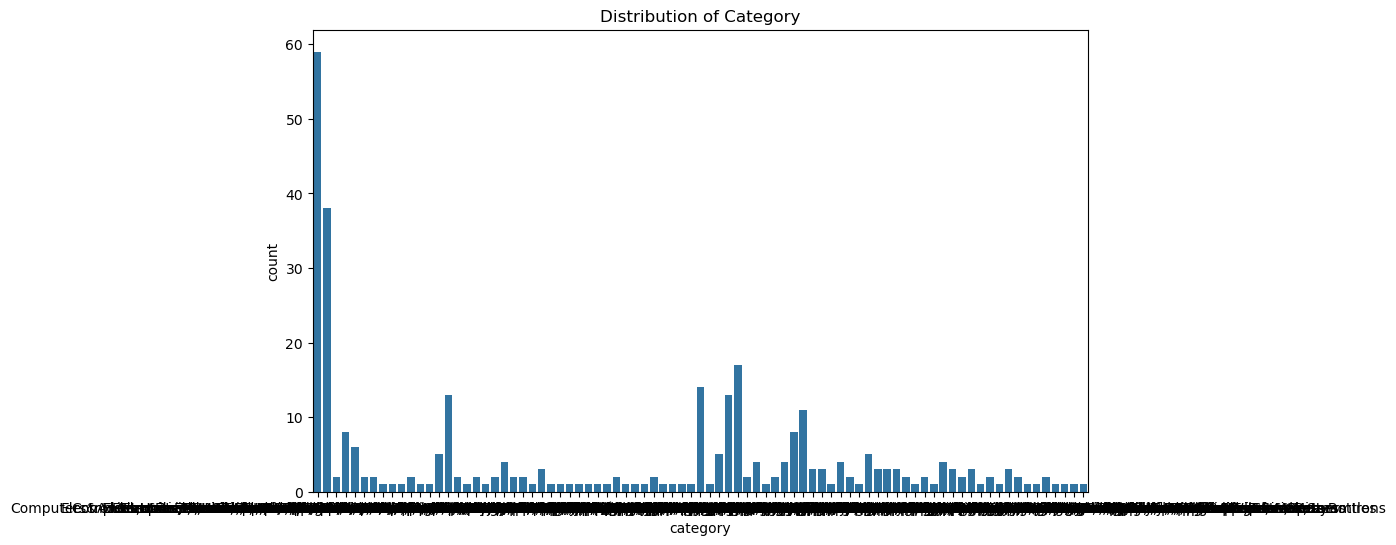

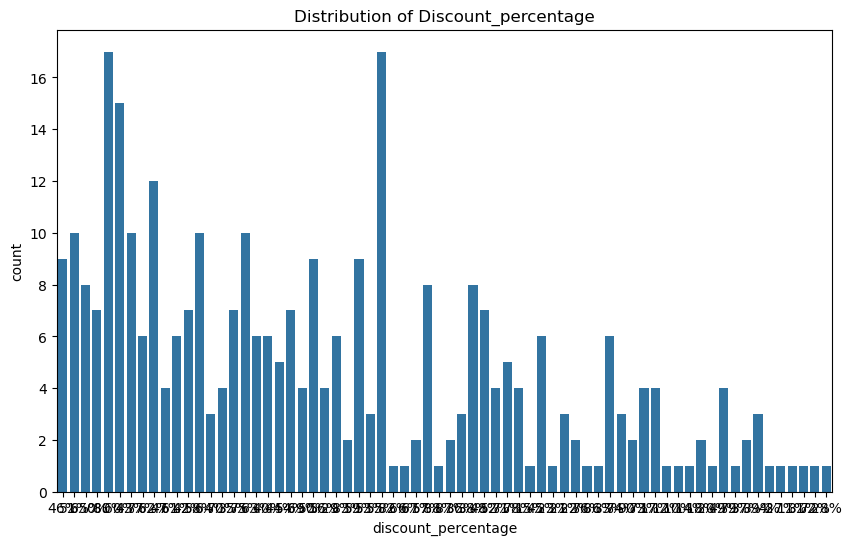

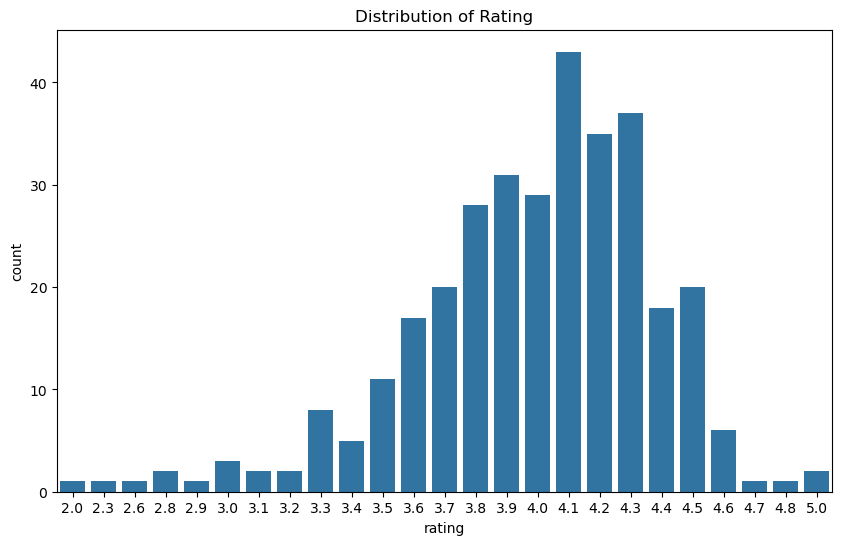

In [40]:
# Categorical features to analyze
categorical_features = ['category', 'discount_percentage', 'rating']

# Create count plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=fig_size)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.show()



## 5. Correlation Heatmap
- A heatmap of correlations helps reveal relationships among numerical features, indicating how they might interact with each other  and potential relationships between features.
- Measures the strength and direction of the linear relationship between two continuous variables



Correlation Matrix:
                  discounted_price  actual_price    rating  rating_count
discounted_price          1.000000      0.959053  0.081520     -0.010780
actual_price              0.959053      1.000000  0.100350     -0.013003
rating                    0.081520      0.100350  1.000000      0.112141
rating_count             -0.010780     -0.013003  0.112141      1.000000


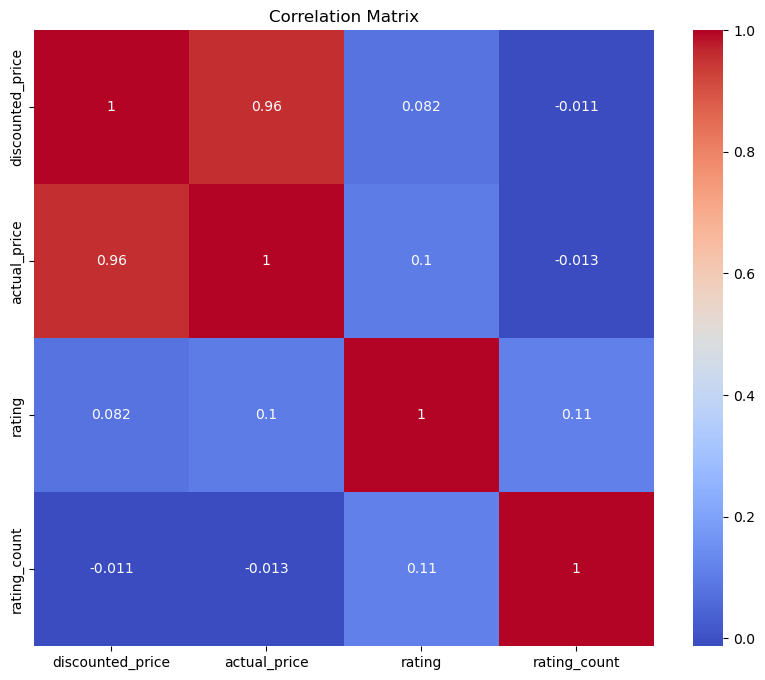

In [42]:
# Check for correlations
corr_matrix = df[['discounted_price', 'actual_price', 'rating', 'rating_count']].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 6. Pair plot
- Pair plots allow you to visualize the relationships between several numerical features at once, showing distributions on the diagonal and scatter plots on the off-diagonals.
- It gains a deeper understanding of the relationships between the numerical variables, which can inform the analysis and modeling decisions.

<Figure size 1200x1000 with 0 Axes>

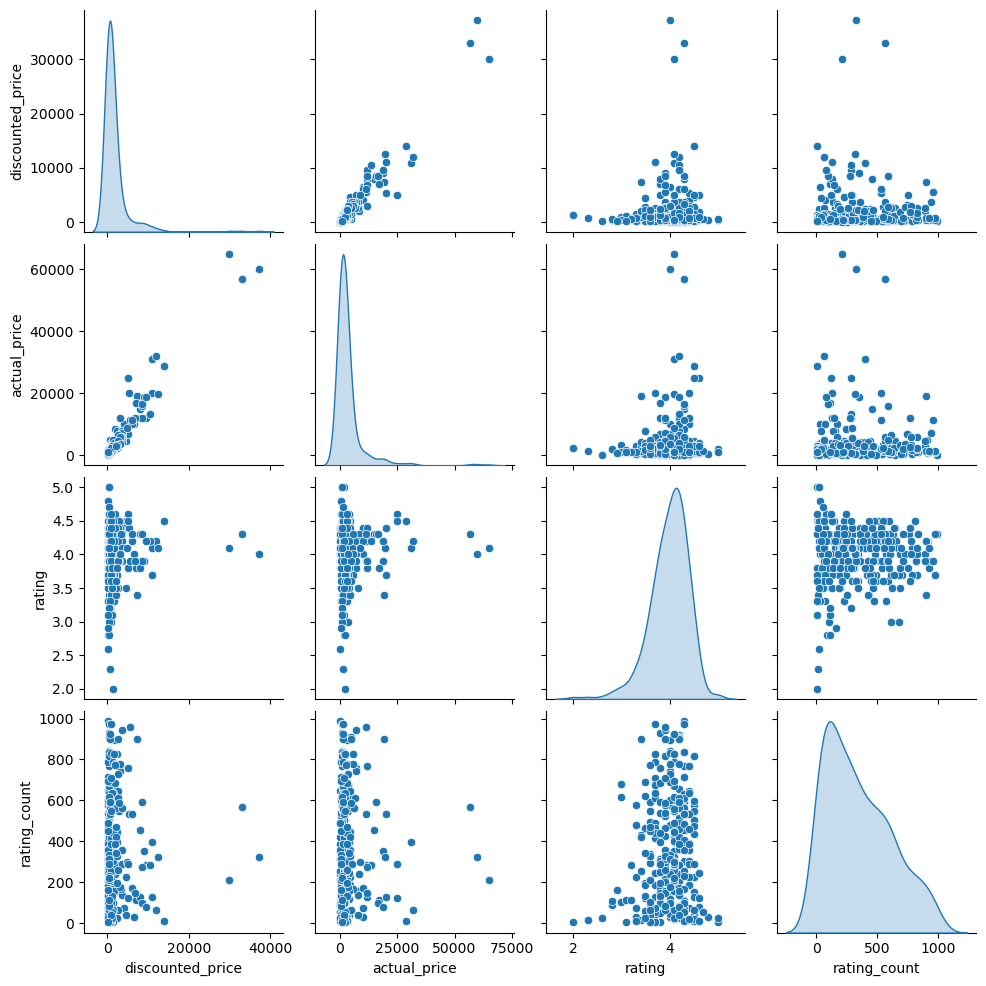

In [44]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Select numerical columns for pairplot
numerical_cols = ['discounted_price', 'actual_price', 'rating', 'rating_count']

# Create pairplot to visualize relationships between numerical variables
plt.figure(figsize=(12, 10))
sns.pairplot(df[numerical_cols], diag_kind='kde')  
plt.show()

## 7. Outliers detection By applying Isolation Forest
- we can uncover insightful outliers that may inform product recommendations, pricing strategies, or customer service improvements.
-  we also get such as unusually high or low ratings, or prices that significantly deviate from the expected range.

In [46]:
# Kernel Density Estimates (KDEs) on the diagonal, showing the distribution of each variable

# Import necessary library
from sklearn.ensemble import IsolationForest

# Select numerical columns
numerical_cols = ['discounted_price', 'actual_price', 'rating']

# Create an Isolation Forest model
if_model = IsolationForest(contamination=0.01)

# Fit the model to the data
if_model.fit(df[numerical_cols])

# Predict outliers
outliers = if_model.predict(df[numerical_cols])

# Identify outliers
outliers_df = df[outliers == -1]



-   A. Outlier detection for Discounted price using using Isolation Forest for outlier detection

Text(0.5, 1.0, 'Outliers for Discounted Price')

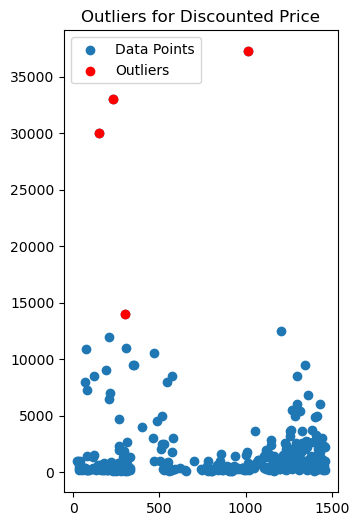

In [48]:
# Plot the outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(df.index, df['discounted_price'], label='Data Points')
plt.scatter(outliers_df.index, outliers_df['discounted_price'], color='red', label='Outliers')
plt.legend()
plt.title('Outliers for Discounted Price')



- B.
It calculates the outliers for the actual_price columnusing using Isolation Forest for outlier detection.

Text(0.5, 1.0, 'Outliers for Actual Price')

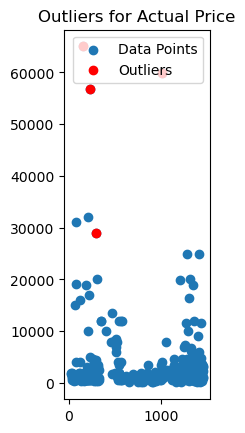

In [50]:
plt.subplot(1, 3, 2)
plt.scatter(df.index, df['actual_price'], label='Data Points')
plt.scatter(outliers_df.index, outliers_df['actual_price'], color='red', label='Outliers')
plt.legend()
plt.title('Outliers for Actual Price')



- C . It calculates the outliers for the rating column using using Isolation Forest for outlier detection

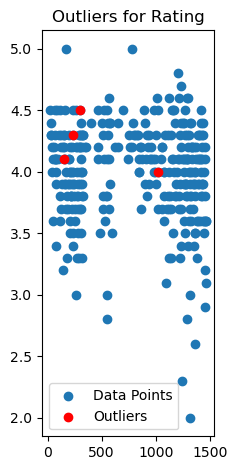

In [52]:
plt.subplot(1, 3, 3)
plt.scatter(df.index, df['rating'], label='Data Points')
plt.scatter(outliers_df.index, outliers_df['rating'], color='red', label='Outliers')
plt.legend()
plt.title('Outliers for Rating')

plt.tight_layout()
plt.show()

#  Top 10 Products Analysis

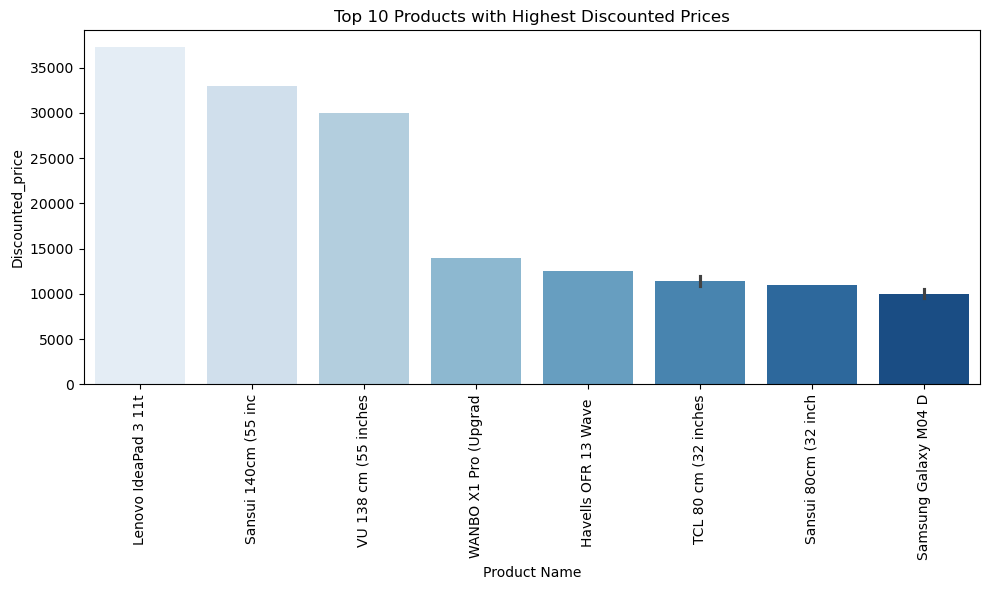

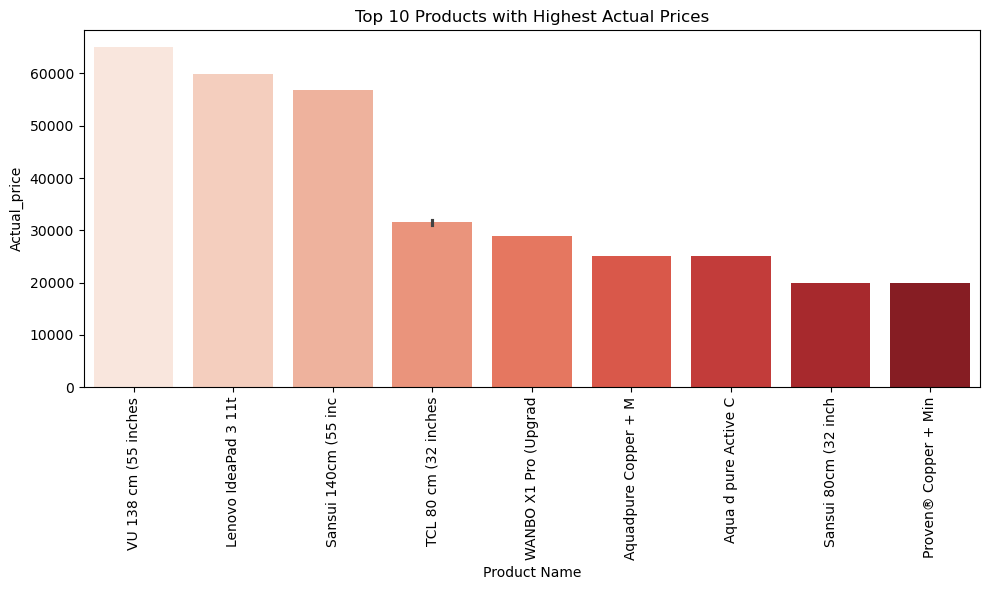

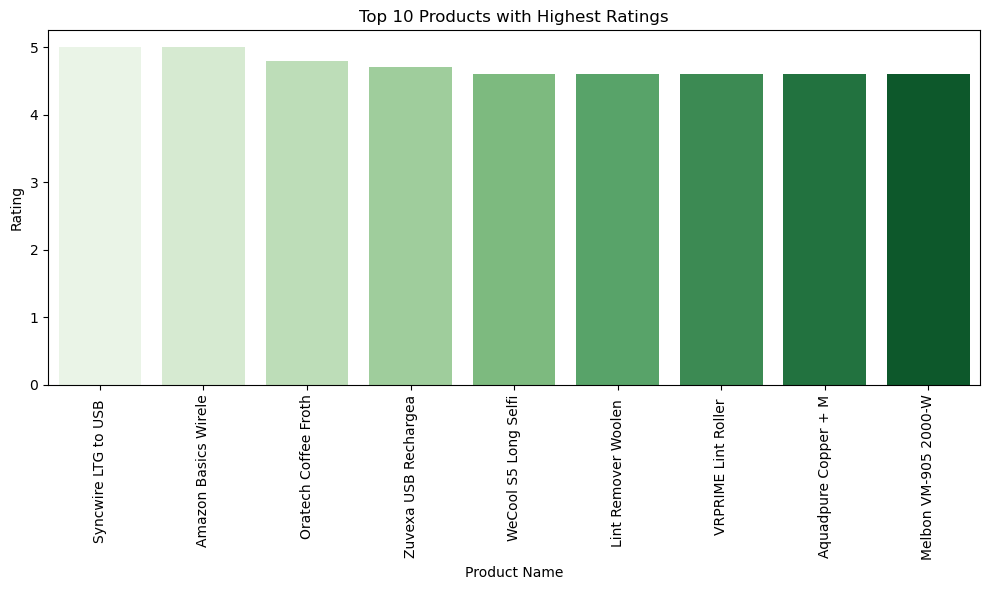

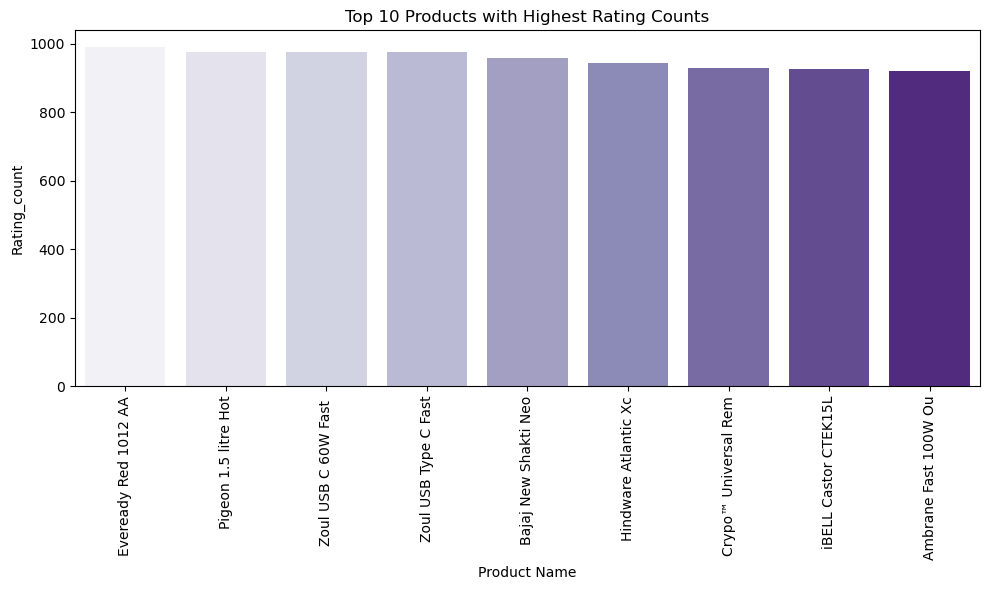

In [54]:

# Section 3: Top 10 Products Analysis
# ======================================

# Function to create bar plot for top 10 products
def plot_top_products(feature, title, palette):
    top_products = df.nlargest(10, feature)[['product_name', feature]]
    top_products['product_name'] = top_products['product_name'].str[:20]
    plt.figure(figsize=fig_size)
    sns.barplot(x='product_name', y=feature, data=top_products, palette=palette)
    plt.title(title)
    plt.xlabel('Product Name')
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Create bar plots for top 10 products
plot_top_products('discounted_price', 'Top 10 Products with Highest Discounted Prices', 'Blues')
plot_top_products('actual_price', 'Top 10 Products with Highest Actual Prices', 'Reds')
plot_top_products('rating', 'Top 10 Products with Highest Ratings', 'Greens')
plot_top_products('rating_count', 'Top 10 Products with Highest Rating Counts', 'Purples')

# 9 Conclusion :
- The exploratory data analysis of the Amazon dataset provided valuable insights into customer purchasing behavior, product pricing, and rating pattern

1. Prices vary:  The discounted_price and actual_price columns exhibited a range of values, with some outliers indicating potential errors or inconsistencies    (Discounted prices and actual prices are different, and some prices are way too high or low.)
2. Rating Patterns: The rating column showed a consistent and reliable pattern, with a majority of products receiving high ratings    (Most products get high ratings from customers.)
3. Correlations: Analysis revealed moderate correlations between discounted_price and actual_price, indicating a relationship between pricing and discounts. The correlation matrix also showed a weak positive correlation between rating and discounted_price.    (Products with higher prices tend to have bigger discounts.)
4. Category Distribution: The category column showed a diverse range of categories, with some categories having more products than others.    (Some categories have more products than others, and prices vary across categories.)
5. Discount Percentage: The discount_percentage column revealed varying levels of discounts across products, with some products having significantly higher discounts than others .  (Some products have really big discounts, while others don't)
6. Rating by Category: Analysis showed that certain categories tend to receive higher ratings than others, indicating potential differences in product quality or customer satisfaction.       (Some categories tend to get higher ratings than others.)
7. Price by Category: The analysis revealed significant differences in pricing across categories, with some categories having significantly higher prices than others.       (Some categories have much higher prices than others.)

8. Relationship between Discounted Price and Rating: The scatter plot showed a weak positive relationship between discounted_price and rating, indicating that higher-priced products tend to receive higher ratings     . Products with higher prices tend to get higher ratings.)
9. . Relationship between Actual Price and Discount Percentage: The scatter plot showed a moderate positive relationship between actual_price and discount_percentage, indicating that higher-priced products tend to have higher discount percentag      eProducts with higher prices tend to have bigger discounts.)s(
10. Outliers: The analysis identified outliers in the discounted_price, actual_price, and rating columns, These outliers may indicate errors or inconsistencies in the dat   aWe found some unusual prices and ratings that might be mistakes.).(

# Summary : 

# Here are the top 4 key findings, refined for clarity and importance:-  
Price Variability: Discounted prices and actual prices vary widely, with some outliers indicating potential errors or inconsistencies
-  Relationship between Price and Rating: A weak positive relationship exists between discounted price and rating(indicating that higher-priced products tend to receive higher ratings.)
-  Category Differences: Significant differences exist in pricing and ratings across categories (with some categories having higher prices and ratings than others
- Discount Patterns: Higher-priced products tend to have higher discount percentages, indicating a relationship between pricing and discounts.nts.a.